# Visualizing Data for Exploratory Analysis
In this chapter we will explore two more Python packages: Matplotlib and Seaborn. Both of them are data visualization tools in Python that helps us create informative charts and graphs. 

To start, we'll import all of the packages that we'll use in this chapter. Import numpy as np and pandas as pd. Then, we'll import a module inside the `matplotlib` package called `pyplot`, and alias it as `plt`. We'll also import `seaborn` as `sns`. 

After importing the packages, we need to add one more line of code: %matplotlib inline. With this line of code, the plot output will be displayed in Jupyter Notebook directly below the code cell that produces it. The plots will also be stored in the notebook document.

In [20]:
# Import packages
# Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader.data as pdr
%matplotlib inline

We will continue to work with financial data throughout this chapter, using the Pandas DataReader package once again to connect to data from Yahoo Finance. 

We will start by creating three separate DataFrames that contain information for stocks and bonds. We are going to import one column for each DataFrame, the adjusted close of the stock or bond for each day.

In [21]:
import pandas_datareader.data as pdr

# Setting dates for the DataFrames
startdate = '2021-01-01'
enddate = '2022-12-31'

# Using 'SPY ETF' as a proxy for general market
stocks = pdr.DataReader('SPY','yahoo', startdate, enddate)[['Adj Close']]

# Using '20 year ETF' as a proxy for bonds
bonds = pdr.DataReader('TLT','yahoo', startdate, enddate)[['Adj Close']]

# Using 'USO ETF' as a proxy for the price of oil
oil = pdr.DataReader('USO','yahoo', startdate, enddate)[['Adj Close']]

print(stocks.head())
print(bonds.head())
print(oil.head())

             Adj Close
Date                  
2021-01-04  359.773285
2021-01-05  362.251160
2021-01-06  364.416870
2021-01-07  369.831207
2021-01-08  371.938385
             Adj Close
Date                  
2021-01-04  152.307281
2021-01-05  151.176178
2021-01-06  148.072784
2021-01-07  146.767609
2021-01-08  146.293930
            Adj Close
Date                 
2021-01-04  32.380001
2021-01-05  33.939999
2021-01-06  34.110001
2021-01-07  34.529999
2021-01-08  35.430000


Currently, the `Adj Close` column is the value of the stock for each day. For this example, let's change the adjusted close to a percent change from the previous day. We can make this change by using the `pct_change()` function from pandas.

In [22]:
# Converting Adj Close to percent returns
stocks = stocks.pct_change()
bonds = bonds.pct_change()
oil = oil.pct_change()
print(stocks.head())
print(bonds.head())
print(oil.head())

            Adj Close
Date                 
2021-01-04        NaN
2021-01-05   0.006887
2021-01-06   0.005978
2021-01-07   0.014858
2021-01-08   0.005698
            Adj Close
Date                 
2021-01-04        NaN
2021-01-05  -0.007426
2021-01-06  -0.020528
2021-01-07  -0.008814
2021-01-08  -0.003227
            Adj Close
Date                 
2021-01-04        NaN
2021-01-05   0.048178
2021-01-06   0.005009
2021-01-07   0.012313
2021-01-08   0.026064


Let's create one more DataFrame by concatenanting `stocks`, `bonds`, and `oil` into `stocksandBonds`. This DataFrame will have the date as the index and three columns: the percent change of the adjusted close for the stocks.

In [26]:
# Using prior example and concating returns column wise and keeping matching dates
stocksAndBonds = pd.concat([stocks, bonds, oil], axis=1, join='inner')

# Renaming columns
stocksAndBonds.columns = ['SPY', 'TLT', 'USO']
# stocksAndBonds.head()
stocksAndBonds

,SPY,TLT,USO
Date,,,
2021-01-04,NaN,NaN,NaN
2021-01-05,0.006887,-0.007426,0.048178
2021-01-06,0.005978,-0.020528,0.005009
2021-01-07,0.014858,-0.008814,0.012313
2021-01-08,0.005698,-0.003227,0.026064
...,...,...,...
2022-11-08,0.005395,0.010935,-0.027299
2022-11-09,-0.020602,0.003287,-0.037599
2022-11-10,0.054954,0.038474,0.007953


Now we have `bonds`, `stocks`, `oil`, and `stocksandBonds` available for us to visualize.

# Creating Histograms
In this lesson we'll create some histograms, also know as distribution plots. This type of graph visualizes how often a certain value occurs in our dataset. The frequency of each value is plotted, so we can see the distrubution of the values.

<AxesSubplot:xlabel='SPY', ylabel='Count'>

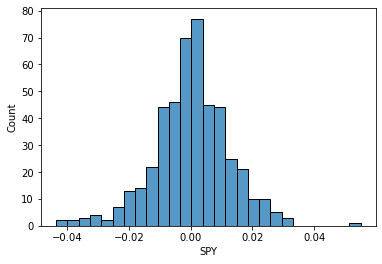

In [27]:
# Create a histogram, or distribution plot, for stocks
sns.histplot(stocksAndBonds["SPY"])

One of the main arguments we can use the control the display of our histograms is `bins`. This defines the number of columns that we want to appear in our histogram. This can help us dig into the distribution of our data in more detail, or provide a more high-level view.

<AxesSubplot:xlabel='SPY', ylabel='Count'>

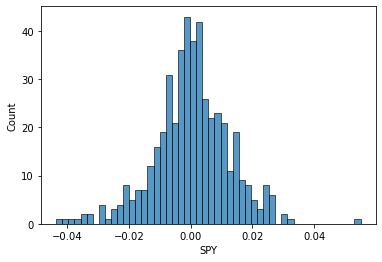

In [30]:
# Set the number of bins, or columns, to appear in the plot
sns.histplot(stocksAndBonds['SPY'], bins =50)

We can also view multiple columns from our data set in a single histogram. To display all three of our stocks, we can input the name of our DataFrame without specifying any columns. We can control how we want to the distribution of the different columns to display. To do this, we use the `multiple` argument, to define if the columns should overlap each other, or go side by side.

<AxesSubplot:ylabel='Count'>

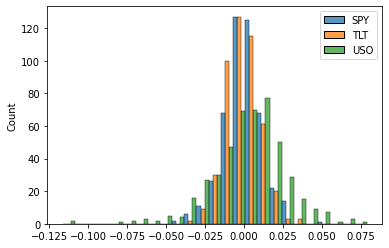

In [31]:
# Create a histogram for all columns in the DataFrame
sns.histplot(stocksAndBonds,bins=25, multiple='dodge')

<AxesSubplot:ylabel='Count'>

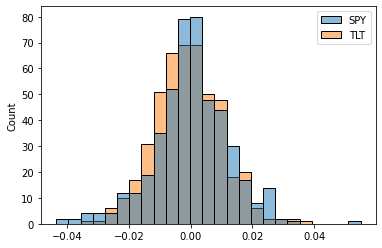

In [36]:
# Create a histogram for stocks and bonds, using multiple column names in a list
sns.histplot(stocksAndBonds[['SPY','TLT']], bins = 25, multiple='layer')

# Creating Box Plots
A box plot, or a box and whisker plot, is used to visualize the distribution of data. This visual uses some summary statistics in order to compare the distribution of different categories, or columns, in a data set:
* Minimum
* Q1 - first quartile
* Q2 - Median
* Q3 - third quartile
* Maximum

These five points are located at each end of the whiskers, each end of the box, and the line in the middle of the box. Outliers are shown as points that occur outside of the minimum and maximum values.

<AxesSubplot:>

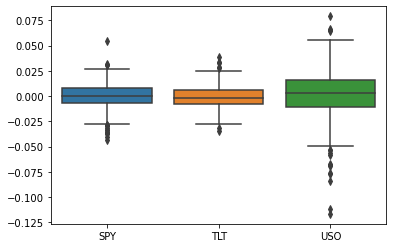

In [37]:
# Visual summary statistics of each category
sns.boxplot(data = stocksAndBonds)

<AxesSubplot:>

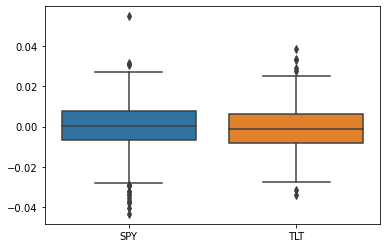

In [38]:
# Select two categories to compare
sns.boxplot(data = stocksAndBonds[['SPY','TLT']])

# Creating a Pairplot
A pairplot allows us to view multiple scatter and distribution plots in a single visual. This way, we can see multiple relationships, between different variables, in one view.

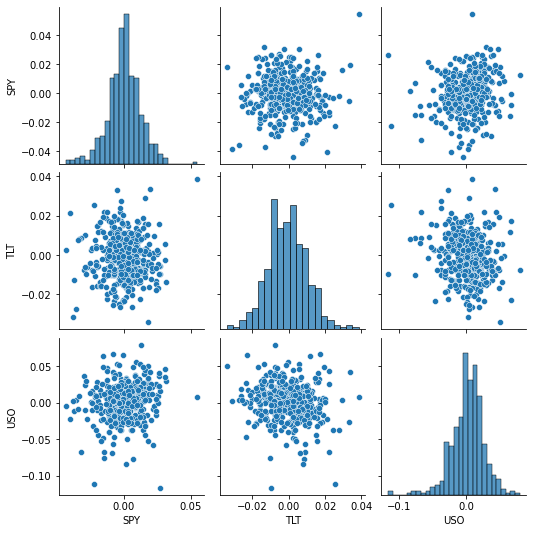

In [39]:
sns.pairplot(stocksAndBonds)

In the diagonal line, we see a distribution plot of a single column. In the other sections, we have a scatter plot that shows the relationship between two different variables. We'll cover scatter plots in more detail later in the course.

# Creating a Correlation Matrix Heatmap
As we saw in the previous chapter, correlation is a method to evaluate the strength of a relationship between two continous variables. Correlation shows not only the direction between two variables, but also the magnitude of the relationship. `Correlation` values are between -1 and 1, with -1 being a perfect negative correlation, and 1 being a perfect positive correlation. A value of 0 indicates that there is no relationship between the two variables.

In [41]:
# Correlation matrix for the three stocks
stocksAndBonds.corr()

,SPY,TLT,USO
SPY,1.00000,0.011710,0.163140
TLT,0.01171,1.000000,-0.154179
USO,0.16314,-0.154179,1.000000


<AxesSubplot:>

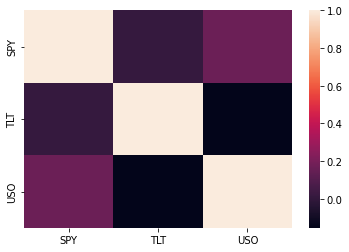

In [43]:
# Visualize the correlation matrix
sns.heatmap(stocksAndBonds.corr())

Three common arguments to control the display of a heatmap are:
* vmin & vmax
* annot
* cmap

`vmin` and `vmax` control the scale of the heatmap. As correlation is measured between -1 and 1, we can update the minimum value to -1.

The `annot` argument allows us to display the values of a section in the heatmap. We can set this to `True` to see the correlation coefficient for each section.

The `cmap` argument lets us set the color of the scale in the heatmap. There are several built-in options to choose from. We can update our heatmap to use the `coolwarm` option.

<AxesSubplot:>

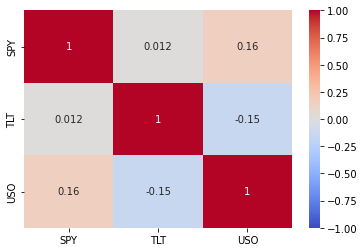

In [46]:
# Update the correlation matrix
sns.heatmap(stocksAndBonds.corr(), vmin = -1, annot= True, cmap = 'coolwarm')